<a href="https://colab.research.google.com/github/jai2shan/TSAI-EVA40-Assignments/blob/master/Session%2012/ReduceLROnPlateau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !git clone https://github.com/jai2shan/TSAI-EVA40-Assignments.git

In [2]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments')
!git pull origin master

remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 16 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.
From https://github.com/jai2shan/TSAI-EVA40-Assignments
 * branch                master     -> FETCH_HEAD
   2bb2440e7..ef0e785e6  master     -> origin/master
Updating 2bb2440e7..ef0e785e6
Fast-forward
 Session 12/OneCycleLR.ipynb        | 641 ++++++++++++++++++++++++++------
 Session 12/ReduceLROnPlateau.ipynb | 731 ++++++++++++++++++++++++++++++++++++-
 2 files changed, 1264 insertions(+), 108 deletions(-)


In [3]:
import os
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')

In [4]:
import torch
import torchvision
import os
from torchvision import transforms
from DataLoader import *

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')
train_path = 'train'
test_path = 'test'
train_loader,test_loader = data_loader_(train_path,test_path,128)

In [5]:
import torch
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from resnet import ResNet18
net = ResNet18(num_classes = 200).to(device)
summary(net, input_size=(3,64,64))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1,


Learning rate search finished. See the graph with {finder_name}.plot()


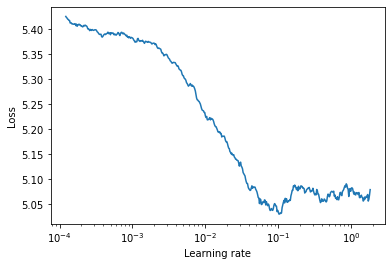

0.10189085519310133

In [6]:
from LR_Finder import *
from Training_Testing import *
tt = TrainTest()
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001)
# scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

lr_finder = LRFinder(net, optimizer, criterion)
lr_finder.range_test(train_loader, end_lr=2, num_iter=500,step_mode="exp")
lr_finder.plot()

import pandas as pd
lr_ = pd.DataFrame(lr_finder.history)
lr_max = lr_.loc[lr_['loss']==lr_['loss'].min(),'lr'].values[0]
lr_max

In [ ]:
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Scripts')
from Training_Testing import TrainTest
import torch.optim as optim
import torch.nn as nn
from torch.optim.lr_scheduler import ReduceLROnPlateau
os.chdir(r'/content/TSAI-EVA40-Assignments/Session 12/Data')

net = ResNet18(num_classes = 200).to(device)
tt = TrainTest()
test_acc = 0
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr_max, momentum=0.9,weight_decay = 0.0005)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=5, verbose=True)

for epoch in range(50):
    print("EPOCH:", epoch)
    tt.train_(net, device, train_loader, optimizer, criterion, epoch,L1 = False)
    acc = tt.test_(net, device, test_loader)  
    scheduler.step(tt.test_losses[epoch])
       
print('Finished Training')

  0%|          | 0/547 [00:00<?, ?it/s]

EPOCH: 0


Loss=4.609919548034668 Batch_id=546 Accuracy=4.15: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -1.8456, Accuracy: 2012/30000 (6.71%)

EPOCH: 1


Loss=4.085978984832764 Batch_id=546 Accuracy=10.25: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -3.0368, Accuracy: 4111/30000 (13.70%)

EPOCH: 2


Loss=3.7179009914398193 Batch_id=546 Accuracy=16.55: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.0747, Accuracy: 5306/30000 (17.69%)

EPOCH: 3


Loss=3.6443428993225098 Batch_id=546 Accuracy=22.13: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.2555, Accuracy: 6539/30000 (21.80%)

EPOCH: 4


Loss=3.498861312866211 Batch_id=546 Accuracy=26.59: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -4.6313, Accuracy: 6477/30000 (21.59%)

EPOCH: 5


Loss=2.9639487266540527 Batch_id=546 Accuracy=29.74: 100%|██████████| 547/547 [05:40<00:00,  1.61it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -5.2185, Accuracy: 8366/30000 (27.89%)

EPOCH: 6


Loss=2.9878718852996826 Batch_id=546 Accuracy=32.27: 100%|██████████| 547/547 [05:40<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.1619, Accuracy: 9002/30000 (30.01%)

EPOCH: 7


Loss=2.830223798751831 Batch_id=546 Accuracy=34.79: 100%|██████████| 547/547 [05:40<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.0092, Accuracy: 9519/30000 (31.73%)

EPOCH: 8


Loss=2.4471263885498047 Batch_id=546 Accuracy=36.81: 100%|██████████| 547/547 [05:40<00:00,  1.61it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.0709, Accuracy: 10195/30000 (33.98%)

EPOCH: 9


Loss=2.4698984622955322 Batch_id=546 Accuracy=38.03: 100%|██████████| 547/547 [05:40<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.5409, Accuracy: 10704/30000 (35.68%)

EPOCH: 10


Loss=2.701526165008545 Batch_id=546 Accuracy=39.72: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.4299, Accuracy: 10085/30000 (33.62%)

EPOCH: 11


Loss=2.804201602935791 Batch_id=546 Accuracy=40.99: 100%|██████████| 547/547 [05:41<00:00,  1.60it/s]
  0%|          | 0/547 [00:00<?, ?it/s]


Test set: Average loss: -6.5062, Accuracy: 10882/30000 (36.27%)

EPOCH: 12


Loss=2.182936668395996 Batch_id=170 Accuracy=43.29:  31%|███▏      | 171/547 [01:47<03:54,  1.60it/s]